In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Importing file
mallcustomer = pd.read_csv('/Users/shiwanisapkota/Desktop/Portfolio Projects/Mall_Customers.csv')

In [3]:
# Looking at the contents of file
mallcustomer

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
...,...,...,...,...,...
195,196,Female,35,120000,79
196,197,Female,45,126000,28
197,198,Male,32,126000,74
198,199,Male,32,137000,18


In [4]:
# Checking for any null values in the dataset
mallcustomer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_($)         0
Spending_Score_(1-100)    0
dtype: int64

In [5]:
# Checking for any duplicate entries in the dataset
mallcustomer.duplicated().sum()

0

In [6]:
# Exploring datatypes
mallcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_Income_($)       200 non-null    int64 
 4   Spending_Score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Descriptive statistics
mallcustomer.describe()

,CustomerID,Age,Annual_Income_($),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


In [8]:
# Let's explore which customer had the highest spending score of 99
mallcustomer[mallcustomer['Spending_Score_(1-100)'] == 99]

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100)
11,12,Female,35,19000,99


In [9]:
# Let's explore which customer was the oldest of all the customers
mallcustomer[mallcustomer['Age'] == 70]

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100)
60,61,Male,70,46000,56
70,71,Male,70,49000,55


In [10]:
# Let's explore which customer had the highest annual income
mallcustomer[mallcustomer['Annual_Income_($)'] == 137000]

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100)
198,199,Male,32,137000,18
199,200,Male,30,137000,83


In [11]:
# Let's drop off the customer ID as it won't be further used for our study
mallcustomer.drop(labels = 'CustomerID', axis = 1, inplace = True);
mallcustomer

,Gender,Age,Annual_Income_($),Spending_Score_(1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40
...,...,...,...,...
195,Female,35,120000,79
196,Female,45,126000,28
197,Male,32,126000,74
198,Male,32,137000,18


Text(0, 0.5, 'Frequency')

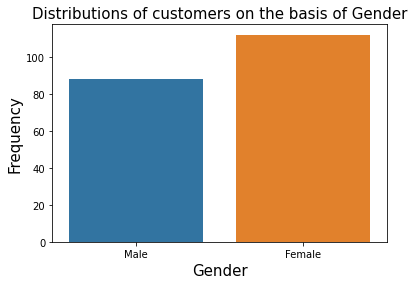

In [12]:
# Exploring distribution of customers on the basis of gender by plotting bar graph
sns.countplot(x = 'Gender', data = mallcustomer)
plt.title('Distributions of customers on the basis of Gender', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Text(0, 0.5, 'Frequency')

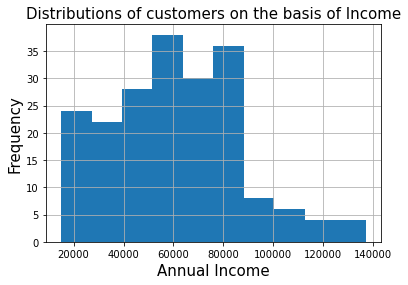

In [13]:
# Exploring distribution of customers income by using histogram
mallcustomer.hist('Annual_Income_($)')
plt.title('Distributions of customers on the basis of Income', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Text(0, 0.5, 'Frequency')

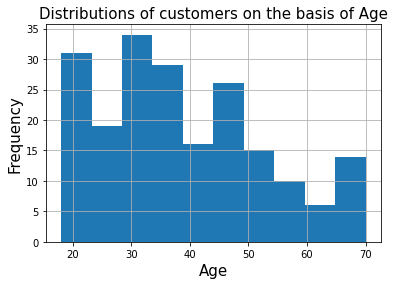

In [14]:
# Exploring distribution of customers on the basis of age by using histogram
mallcustomer.hist('Age')
plt.title('Distributions of customers on the basis of Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

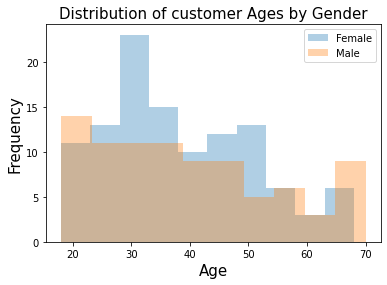

In [15]:
# Exploring distribution of customer ages by gender using histogram
plt.hist('Age', data = mallcustomer[mallcustomer['Gender'] == 'Female'], alpha = 0.35, label = 'Female')
plt.hist('Age', data = mallcustomer[mallcustomer['Gender'] == 'Male'], alpha = 0.35, label = 'Male')
plt.title('Distribution of customer Ages by Gender', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()

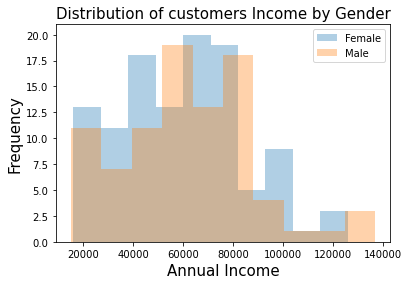

In [16]:
# Exploring distribution of customers income by gender using histogram
plt.hist('Annual_Income_($)', data = mallcustomer[mallcustomer['Gender'] == 'Female'], alpha = 0.35, label = 'Female')
plt.hist('Annual_Income_($)', data = mallcustomer[mallcustomer['Gender'] == 'Male'], alpha = 0.35, label = 'Male')
plt.title('Distribution of customers Income by Gender', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()

In [17]:
# Let's find out the average annual income for male and female customers
male_customers = mallcustomer[mallcustomer['Gender'] == 'Male']
female_customers = mallcustomer[mallcustomer['Gender'] == 'Female']
a = (male_customers['Annual_Income_($)'].mean())
b = (female_customers['Annual_Income_($)'].mean())
print ('The average annual income for male customers is ' + str(a))
print ('The average annual income for female customers is ' + str(b))

The average annual income for male customers is 62227.27272727273
The average annual income for female customers is 59250.0


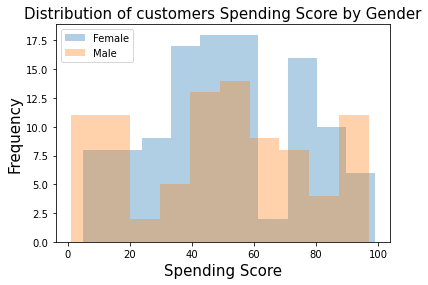

In [18]:
# Exploring distribution of customers spending score by gender using histogram
plt.hist('Spending_Score_(1-100)', data = mallcustomer[mallcustomer['Gender'] == 'Female'], alpha = 0.35, label = 'Female')
plt.hist('Spending_Score_(1-100)', data = mallcustomer[mallcustomer['Gender'] == 'Male'], alpha = 0.35, label = 'Male')
plt.title('Distribution of customers Spending Score by Gender', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()

In [19]:
# Let's find out the average spending scores for male and female customers
a = (male_customers['Spending_Score_(1-100)'].mean())
b = (female_customers['Spending_Score_(1-100)'].mean())
print ('The average spending score for male customers is ' + str(a))
print ('The average spending score for female customers is ' + str(b))

The average spending score for male customers is 48.51136363636363
The average spending score for female customers is 51.526785714285715


Text(0.5, 1.0, 'Correlation Heatmap for mall customers')

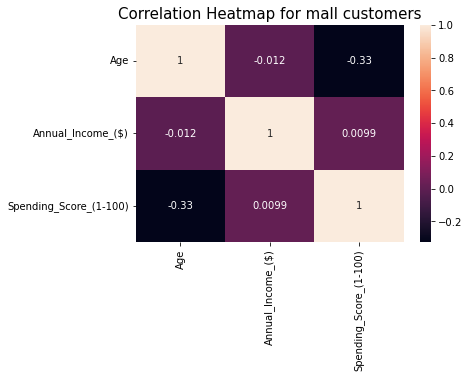

In [20]:
# Let's see if there is any visible correlation between any parameters
sns.heatmap(mallcustomer.corr(), annot = True)
plt.title('Correlation Heatmap for mall customers', fontsize = 15)

Text(0.5, 1.0, 'Correlation Heatmap for male customers')

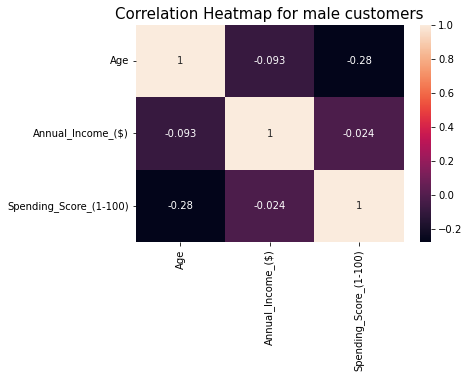

In [21]:
# Let's visualize the correlation for male customers with other parameters
sns.heatmap(male_customers.corr(), annot = True)
plt.title('Correlation Heatmap for male customers', fontsize = 15)

Text(0.5, 1.0, 'Correlation Heatmap for female customers')

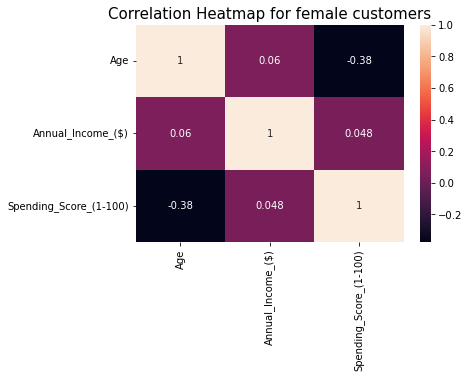

In [22]:
# Let's visualize the correlation for female customers with other parameters
sns.heatmap(female_customers.corr(), annot = True)
plt.title('Correlation Heatmap for female customers', fontsize = 15)

In [23]:
#Let's use Annual Income and Spending Scores to determine the optimal numbers of clusters in our dataset
mallcustomer_cluster = mallcustomer.iloc[:,[2,3]]
mallcustomer_cluster.head()

,Annual_Income_($),Spending_Score_(1-100)
0,15000,39
1,15000,81
2,16000,6
3,16000,77
4,17000,40


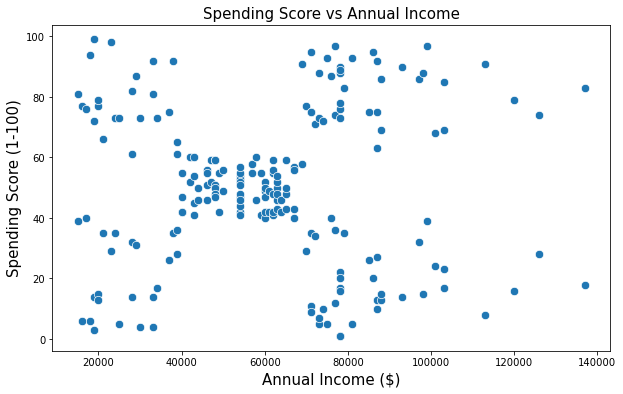

In [24]:
# Let's visualize using scatter plot to check if we can see any patterns in our data
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual_Income_($)', y = 'Spending_Score_(1-100)', data = mallcustomer_cluster, s = 70)
plt.xlabel('Annual Income ($)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.title('Spending Score vs Annual Income', fontsize = 15)
plt.show()

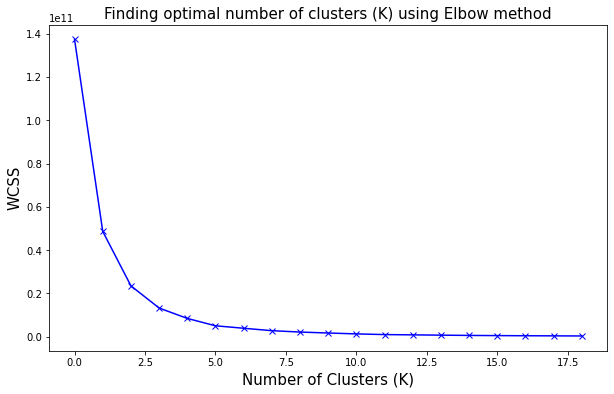

In [25]:
# Finding the optimal number of clusters (K) in our dataset using Elbow method
wcss = []
K = range(1, 20)
for i in K:
  km = KMeans(n_clusters = i)
  km.fit(mallcustomer_cluster)
  wcss.append(km.inertia_) 

plt.figure(figsize = (10, 6))
plt.plot(wcss, 'bx-')
plt.title('Finding optimal number of clusters (K) using Elbow method', fontsize = 15)
plt.xlabel('Number of Clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [ ]:
# From the above graph, we can see that elbow of the curve seems to be formed from 5th cluster 
# so we choose the number of clusters (k) for our dataset as 5.